# Analysis on Laws & Incentives - Electric Vehicles

## Import Data from US Dept of Energy - Office of Energy Efficiency & Renewable Energy 
Data includes laws and incentives in which jurisdiction (federal or by state), what technology/fuel (EVs), what type of incentive or regulation (tax incentives), and what type of user benefits from it or who it's aimed for (producer or consumer).
From https://afdc.energy.gov/laws/search

In [356]:
import pandas as pd

In [357]:
ev_laws_df = pd.read_csv('laws_and_incentives(11_16_2021).csv')
ev_laws_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Sequence Number,Type,Agency,Significant Update Date,Expired Date,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,References
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...,2005-08-10 00:00:00 UTC,NaN,False,54.0,Programs,U.S. Department of Transportation,NaN,NaN,NaN,NaN,NaN,BIOD|ETH|ELEC|HY|IR|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV,NaN
1,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...,NaN,NaN,False,21.0,Programs,U.S. Department of Energy,NaN,NaN,NaN,NaN,NaN,AFTMKTCONV|BIOD|ETH|ELEC|EFFEC|HEV|HY|IR|NG|NE...,GNT|OTHER,NaN,STATION|AFP|PURCH|MAN|FLEET|GOV|IND,NaN
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...,NaN,NaN,False,26.0,Programs,U.S. Department of Energy,NaN,NaN,NaN,NaN,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|PHEV|LPG,GNT,NaN,OTHER,NaN
3,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...,NaN,NaN,False,34.0,Programs,U.S. Environmental Protection Agency,NaN,NaN,NaN,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,PURCH|FLEET|OTHER,NaN
4,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...,NaN,NaN,False,34.0,Programs,U.S. Environmental Protection Agency,NaN,NaN,NaN,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT|OTHER,NaN,FLEET|GOV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",NaN,NaN,True,93.0,Utility/Private Incentives,NaN,2021-11-16 00:27:44 UTC,NaN,NaN,NaN,NaN,ELEC,RBATE,NaN,IND,NaN
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,NaN,NaN,True,125.0,Utility/Private Incentives,NaN,2021-11-16 00:30:27 UTC,NaN,NaN,NaN,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND,NaN
897,12724,CA,Electric School Bus Grant - Central Coast Comm...,CCCE offers grants to school districts for the...,NaN,NaN,True,127.0,Utility/Private Incentives,NaN,2021-11-16 00:37:43 UTC,NaN,NaN,NaN,NaN,ELEC,GNT,NaN,OTHER,NaN
898,12725,CA,Zero-Emission Vehicle (ZEV) Requirements for T...,The California Air Resource Board (CARB) and t...,2019-01-01 00:00:00 UTC,NaN,True,70.0,Laws and Regulations,NaN,2021-11-16 01:11:00 UTC,NaN,NaN,NaN,NaN,ELEC|HY|PHEV,NaN,REQ,GOV,NaN


## Questions needed to answer
- Do energy laws and/or incentives influence the rate of electric vehicle production and of consumer purchases?
- At what frequency the states are switching towards electric cars?

Things to accomplish can be:
1. analyze text from summary of each law/incentive and make a word cloud
2. do a linear regression wrt energy laws/incentives that are related to afv manufacturer/af producer/commercial and another related to af purchaser/personal vehicle owner or driver/, and use it with production dataset and consumer dataset
3. use geopandas to create a us map on number of laws/incentives each state has 
4. get rate of laws/incentives introduced throughout the years for each state - use geopandas

## Apply Text Mining/Pre-processing to Text Summary
### Ways I Will Preprocess:
1. Stopword removal
2. Lemmatisation (reduce words to their root, i.e. caring would be care)
3. Convert uppercase to lowercase
4. Tokenization (? maybe not sure)

In [358]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S UTC")

In [359]:
# drop columns that aren't needed: references, amended date, sequence number
ev_laws_df.drop('References', axis=1, inplace=True)
ev_laws_df.drop('Sequence Number', axis=1, inplace=True)

# drop rows where law/incentive has been repealed or is now archived and not relevant or has expired already
ev_laws_df['Expired Date'] = pd.to_datetime(ev_laws_df['Expired Date'], infer_datetime_format=True)
ev_laws_df['Archived Date'] = pd.to_datetime(ev_laws_df['Archived Date'], infer_datetime_format=True)
ev_laws_df['Repealed Date'] = pd.to_datetime(ev_laws_df['Repealed Date'], infer_datetime_format=True)

ev_current_laws_df = ev_laws_df[~(ev_laws_df['Expired Date'] < dt_string)]
ev_current_laws_df = ev_current_laws_df[~(ev_current_laws_df['Archived Date'] < dt_string)]
ev_current_laws_df = ev_current_laws_df[~(ev_current_laws_df['Repealed Date'] < dt_string)]

# drop these columns now
ev_current_laws_df.drop('Expired Date', axis=1, inplace=True)
ev_current_laws_df.drop('Archived Date', axis=1, inplace=True)
ev_current_laws_df.drop('Repealed Date', axis=1, inplace=True)

In [360]:
ev_current_laws_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...,2005-08-10 00:00:00 UTC,NaN,False,Programs,U.S. Department of Transportation,NaN,NaN,BIOD|ETH|ELEC|HY|IR|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV
1,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...,NaN,NaN,False,Programs,U.S. Department of Energy,NaN,NaN,AFTMKTCONV|BIOD|ETH|ELEC|EFFEC|HEV|HY|IR|NG|NE...,GNT|OTHER,NaN,STATION|AFP|PURCH|MAN|FLEET|GOV|IND
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...,NaN,NaN,False,Programs,U.S. Department of Energy,NaN,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|PHEV|LPG,GNT,NaN,OTHER
3,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...,NaN,NaN,False,Programs,U.S. Environmental Protection Agency,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,PURCH|FLEET|OTHER
4,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...,NaN,NaN,False,Programs,U.S. Environmental Protection Agency,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT|OTHER,NaN,FLEET|GOV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:27:44 UTC,NaN,ELEC,RBATE,NaN,IND
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:30:27 UTC,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND
897,12724,CA,Electric School Bus Grant - Central Coast Comm...,CCCE offers grants to school districts for the...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:37:43 UTC,NaN,ELEC,GNT,NaN,OTHER
898,12725,CA,Zero-Emission Vehicle (ZEV) Requirements for T...,The California Air Resource Board (CARB) and t...,2019-01-01 00:00:00 UTC,NaN,True,Laws and Regulations,NaN,2021-11-16 01:11:00 UTC,NaN,ELEC|HY|PHEV,NaN,REQ,GOV


## Generate wordcloud
Could try to generate wordcloud based on the type of row:
1. wordcloud for user category, 
2. regulation category, 
3. incentive category, 
4. technology category, 
5. topic

In [361]:
# get columns relevant to text summary
ev_laws_text_df = ev_current_laws_df[['Law Id','State', 'Title', 'Text']]
ev_laws_text_df

,Law Id,State,Title,Text
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...
1,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...
3,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...
4,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...
...,...,...,...,...
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for..."
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...
897,12724,CA,Electric School Bus Grant - Central Coast Comm...,CCCE offers grants to school districts for the...
898,12725,CA,Zero-Emission Vehicle (ZEV) Requirements for T...,The California Air Resource Board (CARB) and t...


In [362]:
# upper to lower
# ev_laws_text_df['Text'] = ev_laws_text_df['Text'].str.lower()
ev_laws_text_df

,Law Id,State,Title,Text
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...
1,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...
3,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...
4,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...
...,...,...,...,...
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for..."
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...
897,12724,CA,Electric School Bus Grant - Central Coast Comm...,CCCE offers grants to school districts for the...
898,12725,CA,Zero-Emission Vehicle (ZEV) Requirements for T...,The California Air Resource Board (CARB) and t...


In [363]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [529]:
ev_incentives_wordcloud_df = ev_current_laws_df[ev_current_laws_df['Type'].str.contains("Incentives")]
text = " ".join(summary for summary in ev_incentives_wordcloud_df['Text'])

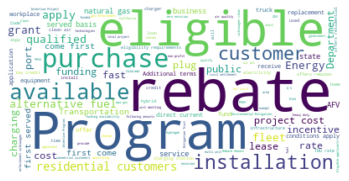

In [534]:
stopwords = set(STOPWORDS)
stopwords.update(['electric vehicle', 'Level','may', 'per','DC', 'new', 'use', 'EV', 'PEV', 'electric', 'vehicle', 'vehicles', 'https', 'must', 'information', 'EVSE', 'including', 'see', 'website', 'Reference'])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Show amount of incentives each state has for EVs and also at the federal level

In [366]:
ev_current_laws_df['Type'].unique()

array(['Programs', 'Laws and Regulations', 'Incentives',
       'State Incentives', 'Utility/Private Incentives'], dtype=object)

In [377]:
# show by states, not federal level
ev_incentives_df = ev_current_laws_df[ev_current_laws_df['Type'].str.contains("Incentives")]
ev_incentives_df = ev_incentives_df[~(ev_incentives_df['State'].str.contains("US"))]

In [378]:
ev_incentives_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories
17,4178,AZ,Alternative Fuel Vehicle (AFV) Emissions Test ...,Qualified AFVs registered for the first time i...,2016-01-01 00:00:00 UTC,NaN,False,State Incentives,NaN,2015-05-13 18:37:27 UTC,NaN,ELEC|HY|NG|LPG,EXEM,NaN,FLEET|GOV|IND
18,4179,AZ,Reduced Alternative Fuel Vehicle (AFV) License...,The vehicle license tax for an AFV registered ...,2018-04-25 00:00:00 UTC,2019-06-07 00:00:00 UTC,False,State Incentives,NaN,2019-06-28 23:33:14 UTC,NaN,ELEC|HY|NG|PHEV|LPG,TAX,NaN,FLEET|GOV|IND
19,4219,CA,Employer Invested Emissions Reduction Funding ...,The South Coast Air Quality Management Distric...,NaN,NaN,False,State Incentives,NaN,NaN,NaN,BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,STATION|MAN|FLEET
20,4241,CA,Plug-In Electric Vehicle (PEV) Charging Rate R...,The Sacramento Municipal Utility District (SMU...,NaN,NaN,False,Utility/Private Incentives,NaN,2018-11-14 16:18:22 UTC,NaN,ELEC|PHEV,OTHER,NaN,IND
22,4272,CO,Alternative Fuel Vehicle (AFV) Weight Exemption,Gross vehicle weight rating limits for AFVs ar...,2016-05-04 00:00:00 UTC,NaN,False,State Incentives,NaN,2016-07-12 17:14:47 UTC,NaN,AFTMKTCONV|ELEC|HY|NG|PHEV|LPG,EXEM,NaN,FLEET|GOV|IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,12719,CA,Electric Vehicle Supply Equipment (EVSE) Grant...,Antelope Valley Air Quality Management Distric...,NaN,NaN,True,State Incentives,NaN,2021-11-16 00:22:46 UTC,NaN,ELEC|PHEV,GNT,NaN,STATION|FLEET|MUD|OTHER
894,12720,CA,Electric Forklift Rebate - Alameda Municipal P...,AMP offers commercial customers a rebate of \$...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:26:02 UTC,NaN,ELEC|OTHER,RBATE,NaN,FLEET
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:27:44 UTC,NaN,ELEC,RBATE,NaN,IND
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:30:27 UTC,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND


In [383]:
ev_incentives_pivot = ev_incentives_df.pivot_table(index="State", columns="Type", aggfunc="size")
ev_incentives_pivot.fillna(0)

Type,State Incentives,Utility/Private Incentives
State,,
AK,0.0,4.0
AL,2.0,2.0
AR,1.0,0.0
AZ,5.0,9.0
CA,41.0,43.0
CO,9.0,7.0
CT,5.0,4.0
DC,3.0,2.0
DE,4.0,2.0


**NOTE**: Are there negative incentives? For example, taxing diesel producers to incentivize producing AFV?
### **NOTE** : NEED TO DESCRIBE DIFFERENCE BTWN STATE INCENTIVES VS UTILITY/PRIVATE INCENTIVES

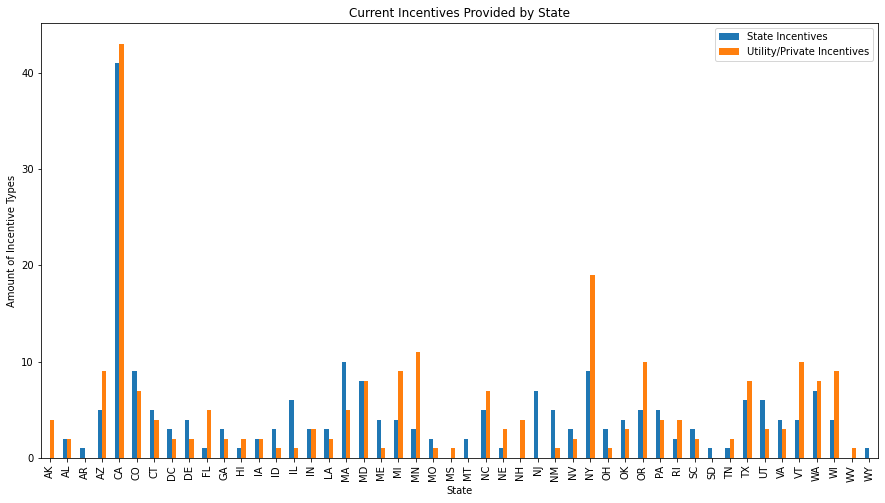

In [386]:
ev_incentives_pivot.plot(kind="bar", figsize=(15,8))
plt.xlabel("State")
plt.ylabel("Amount of Incentive Types")
plt.title("Current Incentives Provided by State")
plt.legend(loc="upper right")
plt.show()

## Get the Top 10 US States that provide State and Utility/Private Incentives

In [309]:
ev_incentives_grouped_by_state = ev_incentives_df.groupby('State')['Type'].count()
sorted_states = ev_incentives_grouped_by_state.sort_values(ascending=False)
sorted_states.head(10)

State
CA    77
NY    28
MA    18
CO    16
MD    16
OR    15
WA    15
MN    14
AZ    14
TX    14
Name: Type, dtype: int64

In [310]:
sorted_states.tail(10)

State
AK    4
HI    3
MO    3
TN    3
MT    2
SD    1
MS    1
AR    1
WV    1
WY    1
Name: Type, dtype: int64

In [513]:
top_5_states = ['CA', 'NY', 'MA', 'CO', 'MD']

## Show the rate at which US states are providing incentives over the years
Show top 5 states

May answer the question: At what frequency the states are switching towards electric cars?

In [514]:
# show time series for all states
ev_states_df = ev_laws_df[~ev_laws_df['State'].str.contains('US') & ev_laws_df['Type'].str.contains('Incentives')]

In [515]:
import numpy as np

In [516]:
# convert date columns to datetime type
ev_states_df['Enacted Date'] = ev_states_df['Enacted Date'].astype('datetime64[ns]')
ev_states_df['Enacted Date'] = pd.to_datetime(ev_states_df['Enacted Date'])
ev_states_df['Amended Date'] = pd.to_datetime(ev_states_df['Amended Date']).astype('datetime64[ns]')
ev_states_df['Significant Update Date'] = pd.to_datetime(ev_states_df['Significant Update Date']).astype('datetime64[ns]')
ev_states_df['Earliest Date'] = np.nan
ev_states_df.info()

C:\Users\eurydice\AppData\Local\Temp/ipykernel_1304/2785006991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_states_df['Enacted Date'] = ev_states_df['Enacted Date'].astype('datetime64[ns]')
C:\Users\eurydice\AppData\Local\Temp/ipykernel_1304/2785006991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_states_df['Enacted Date'] = pd.to_datetime(ev_states_df['Enacted Date'])
C:\Users\eurydice\AppData\Local\Temp/ipykernel_1304/2785006991.py:4: SettingWithCopyWarning: 
A value is trying to be set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 17 to 897
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   Law Id                   448 non-null    int64              
 1   State                    448 non-null    object             
 2   Title                    448 non-null    object             
 3   Text                     448 non-null    object             
 4   Enacted Date             102 non-null    datetime64[ns]     
 5   Amended Date             39 non-null     datetime64[ns]     
 6   Recent?                  448 non-null    bool               
 7   Type                     448 non-null    object             
 8   Agency                   0 non-null      object             
 9   Significant Update Date  378 non-null    datetime64[ns]     
 10  Expired Date             29 non-null     datetime64[ns, UTC]
 11  Archived Date            6 non-

In [517]:
min_dates = ev_states_df[['Enacted Date', 'Significant Update Date', 'Amended Date']].min(axis=1)
min_dates

17    2015-05-13 18:37:27
18    2018-04-25 00:00:00
19                    NaT
20    2018-11-14 16:18:22
22    2016-05-04 00:00:00
              ...        
893   2021-11-16 00:22:46
894   2021-11-16 00:26:02
895   2021-11-16 00:27:44
896   2021-11-16 00:30:27
897   2021-11-16 00:37:43
Length: 448, dtype: datetime64[ns]

In [518]:
ev_states_df['Earliest Date'] = min_dates
ev_states_df.sort_values('Earliest Date')

C:\Users\eurydice\AppData\Local\Temp/ipykernel_1304/1344921561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_states_df['Earliest Date'] = min_dates


,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Expired Date,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,Earliest Date
469,12136,PA,Alternative Fuels Incentive Grant (AFIG) Program,The AFIG Program provides financial assistance...,1992-01-01,2008-07-10,False,State Incentives,NaN,2018-12-11 17:54:29,NaT,NaT,NaT,NaN,AFTMKTCONV|BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV,1992-01-01
256,11518,SC,Alternative Fuel Vehicle (AFV) Revolving Loan ...,The South Carolina Business Development Corpor...,1992-07-01,NaT,False,State Incentives,NaN,2017-08-09 12:45:20,NaT,NaT,NaT,NaN,AFTMKTCONV|BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,LOANS,NaN,FLEET|GOV,1992-07-01
255,11517,SC,Alternative Fuel Vehicle (AFV) Revolving Loan ...,The South Carolina Energy Office (SCEO) provid...,1992-07-01,NaT,False,State Incentives,NaN,2016-08-09 17:48:52,NaT,NaT,NaT,NaN,AFTMKTCONV|BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,LOANS,NaN,FLEET|GOV,1992-07-01
278,11583,CT,Electric Vehicle Emissions Inspection Exemption,Vehicles powered exclusively by electricity ar...,NaT,1993-07-01,False,State Incentives,NaN,NaT,NaT,NaT,NaT,NaN,ELEC,EXEM,NaN,FLEET|GOV|IND,1993-07-01
53,5334,WI,Alternative Fuel Tax Exemption,"A county, city, village, town, or other politi...",1993-08-10,NaT,False,State Incentives,NaN,NaT,NaT,NaT,NaT,NaN,BIOD|ETH|ELEC|HY|NG|PHEV|LPG,EXEM|TAX,NaN,STATION|PURCH|FLEET|IND,1993-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,10414,MN,Electric Vehicle Supply Equipment (EVSE) Rebat...,Dakota Electric Association (DEA) offers a TOU...,NaT,NaT,False,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaT,NaN,ELEC|PHEV,OTHER|RBATE,NaN,STATION|IND,NaT
449,12100,CA,Alternative Fuel Vehicle (AFV) Technical Train...,The San Joaquin Valley Air Pollution Control D...,NaT,NaT,False,State Incentives,NaN,NaT,NaT,NaT,NaT,NaN,ELEC|HY|NG|PHEV,GNT,NaN,STATION|MAN|FLEET|GOV|OTHER,NaT
636,12400,SD,Diesel Emission Reduction Grants,The South Dakota Department of Environment and...,NaT,NaT,False,State Incentives,NaN,NaT,NaT,NaT,NaT,NaN,BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,FLEET|GOV,NaT
832,12643,LA,Alternative Fueling Infrastructure Tax Credit,Louisiana offers a nonrefundable income tax cr...,NaT,NaT,False,State Incentives,NaN,NaT,2022-01-01 00:00:00+00:00,NaT,NaT,NaN,BIOD|ELEC|NG|PHEV|LPG,TAX,NaN,STATION|PURCH,NaT


In [519]:
# drop rows with null earliest dates
ev_states_df = ev_states_df[~pd.isnull(ev_states_df['Earliest Date'])]
ev_states_df.drop('Enacted Date', axis=1, inplace=True)
ev_states_df.drop('Significant Update Date', axis=1, inplace=True)
ev_states_df.drop('Amended Date', axis=1, inplace=True)

In [520]:
top_5_states_df = ev_states_df[ev_states_df['State'].isin(top_5_states)]

In [521]:
top_5_states_df

,Law Id,State,Title,Text,Recent?,Type,Agency,Expired Date,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,Earliest Date
20,4241,CA,Plug-In Electric Vehicle (PEV) Charging Rate R...,The Sacramento Municipal Utility District (SMU...,False,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,OTHER,NaN,IND,2018-11-14 16:18:22
22,4272,CO,Alternative Fuel Vehicle (AFV) Weight Exemption,Gross vehicle weight rating limits for AFVs ar...,False,State Incentives,NaN,NaT,NaT,NaT,NaN,AFTMKTCONV|ELEC|HY|NG|PHEV|LPG,EXEM,NaN,FLEET|GOV|IND,2016-05-04 00:00:00
55,5359,CA,High Occupancy Vehicle (HOV) and High Occupanc...,"Compressed natural gas, hydrogen, electric, an...",False,State Incentives,NaN,2024-01-01 00:00:00+00:00,NaT,NaT,NaN,ELEC|HY|NG|PHEV,EXEM,NaN,FLEET|GOV|IND,2006-09-29 00:00:00
117,6304,NY,High Occupancy Vehicle (HOV) Lane Exemption,"Through the Clean Pass Program, eligible elect...",False,State Incentives,NaN,2025-09-30 00:00:00+00:00,NaT,NaT,NaN,ELEC|HEV|PHEV,EXEM,NaN,FLEET|GOV|IND,2006-03-01 00:00:00
118,6307,CA,Alternative Fuel and Vehicle Incentives,The California Energy Commission (CEC) adminis...,False,State Incentives,NaN,NaT,NaT,NaT,NaN,AFTMKTCONV|BIOD|ETH|ELEC|HY|NG|PHEV|LPG,GNT|LOANS,NaN,STATION|FLEET|GOV|OTHER|IND,2007-10-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,12719,CA,Electric Vehicle Supply Equipment (EVSE) Grant...,Antelope Valley Air Quality Management Distric...,True,State Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,GNT,NaN,STATION|FLEET|MUD|OTHER,2021-11-16 00:22:46
894,12720,CA,Electric Forklift Rebate - Alameda Municipal P...,AMP offers commercial customers a rebate of \$...,True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|OTHER,RBATE,NaN,FLEET,2021-11-16 00:26:02
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC,RBATE,NaN,IND,2021-11-16 00:27:44
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND,2021-11-16 00:30:27


### Show top 5 states rate of incentives

In [522]:
top_5_states_grouped = top_5_states_df.groupby('State')['Type'].count().sort_values(ascending=False)
top_5_states_grouped.head(30)

State
CA    75
NY    27
MD    17
CO    16
MA    16
Name: Type, dtype: int64

In [524]:
top_5_states_df['n'] = 1

C:\Users\eurydice\AppData\Local\Temp/ipykernel_1304/2710544728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_states_df['n'] = 1


In [525]:
top_5_states_df

,Law Id,State,Title,Text,Recent?,Type,Agency,Expired Date,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,Earliest Date,n
20,4241,CA,Plug-In Electric Vehicle (PEV) Charging Rate R...,The Sacramento Municipal Utility District (SMU...,False,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,OTHER,NaN,IND,2018-11-14 16:18:22,1
22,4272,CO,Alternative Fuel Vehicle (AFV) Weight Exemption,Gross vehicle weight rating limits for AFVs ar...,False,State Incentives,NaN,NaT,NaT,NaT,NaN,AFTMKTCONV|ELEC|HY|NG|PHEV|LPG,EXEM,NaN,FLEET|GOV|IND,2016-05-04 00:00:00,1
55,5359,CA,High Occupancy Vehicle (HOV) and High Occupanc...,"Compressed natural gas, hydrogen, electric, an...",False,State Incentives,NaN,2024-01-01 00:00:00+00:00,NaT,NaT,NaN,ELEC|HY|NG|PHEV,EXEM,NaN,FLEET|GOV|IND,2006-09-29 00:00:00,1
117,6304,NY,High Occupancy Vehicle (HOV) Lane Exemption,"Through the Clean Pass Program, eligible elect...",False,State Incentives,NaN,2025-09-30 00:00:00+00:00,NaT,NaT,NaN,ELEC|HEV|PHEV,EXEM,NaN,FLEET|GOV|IND,2006-03-01 00:00:00,1
118,6307,CA,Alternative Fuel and Vehicle Incentives,The California Energy Commission (CEC) adminis...,False,State Incentives,NaN,NaT,NaT,NaT,NaN,AFTMKTCONV|BIOD|ETH|ELEC|HY|NG|PHEV|LPG,GNT|LOANS,NaN,STATION|FLEET|GOV|OTHER|IND,2007-10-14 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,12719,CA,Electric Vehicle Supply Equipment (EVSE) Grant...,Antelope Valley Air Quality Management Distric...,True,State Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,GNT,NaN,STATION|FLEET|MUD|OTHER,2021-11-16 00:22:46,1
894,12720,CA,Electric Forklift Rebate - Alameda Municipal P...,AMP offers commercial customers a rebate of \$...,True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|OTHER,RBATE,NaN,FLEET,2021-11-16 00:26:02,1
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC,RBATE,NaN,IND,2021-11-16 00:27:44,1
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,True,Utility/Private Incentives,NaN,NaT,NaT,NaT,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND,2021-11-16 00:30:27,1


In [526]:
# have running count for each year for each state and when the incentive has been archived or repealed or expired 
# the current year then reduce count by one
top_5_states_pivot = pd.pivot_table(top_5_states_df,values='n',index=['State'],columns=top_5_states_df['Earliest Date'].dt.year,aggfunc=np.sum, fill_value=0).cumsum(axis=1)
top_5_states_transposed = top_5_states_pivot.transpose()
top_5_states_transposed

State,CA,CO,MA,MD,NY
Earliest Date,,,,,
1999,0,0,1,0,0
2006,1,0,1,0,1
2007,2,0,1,0,1
2009,2,1,1,0,1
2010,6,1,1,1,1
2011,6,1,1,1,2
2012,6,2,1,1,3
2013,6,2,1,1,4
2014,8,3,2,2,4


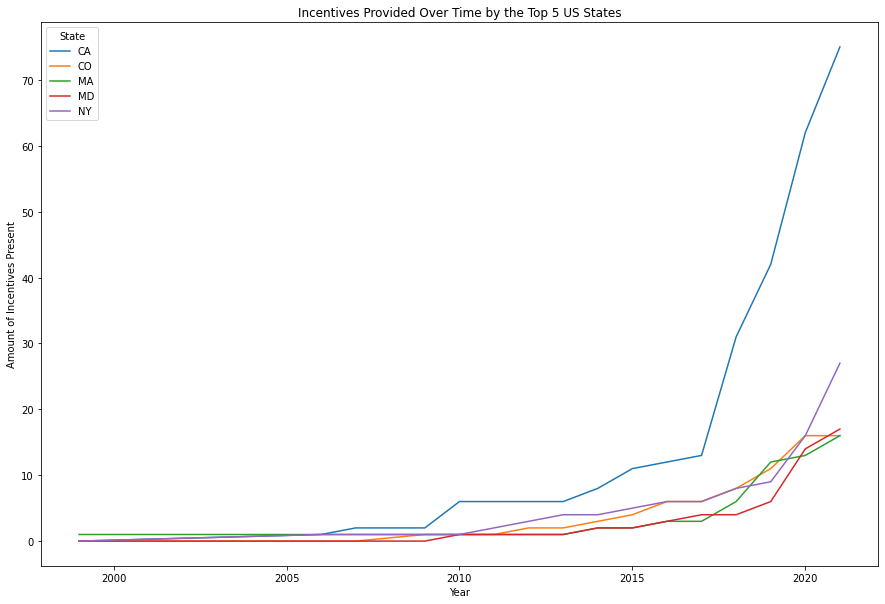

In [528]:
top_5_states_transposed.plot(figsize=(15,10))
plt.xlabel("Year")
plt.ylabel("Amount of Incentives Present")
plt.title("Incentives Provided Over Time by the Top 5 US States")
plt.savefig('top_5_states_with_incentives.png')